In [108]:
import os
import pandas as pd

os.chdir("C:\\Users\\saad6\\Downloads\\UMD\\vfrias\\331_3855_bundle_archive")
data = pd.read_csv('natural_disaster_human_mobility.csv')
#data1 = [print(d) for d in data]
data.rename(columns={'disaster.event':'events','user.anon':'user','longitude.anon':'longitude'}, inplace=True)
#data['id'] = data.assign(period=lambda x: x.disaster.event+x.user.anon)
#data['id'] = ['_'.join(i) for i in zip(data['disaster.event'],data['user.anon'].map(str))]


In [109]:
#data.describe()
aggregated_result = data['events'].value_counts()
aggregated_result

01_Wipha              1416906
08_Rammasun_Manila     817516
32_Detroit             765349
31_Phoenix             579733
33_Baltimore           328880
02_Halong              171559
23_Atlanta             157178
21_Norfolk             115017
12_Bohol               114606
42_AuFire2              64370
06_Kalmaegi             43396
41_AuFire1              43275
14_Napa                 38019
13_Iquique              15297
22_Hamburg              15053
Name: events, dtype: int64

In [124]:
df_disaster_groups = data.groupby(data.events).mean()
df_disaster_groups

,user,latitude,longitude
events,,,
01_Wipha,24368.338734,139.668645,28.391620
02_Halong,2482.137684,127.762166,43.006657
06_Kalmaegi,591.625357,120.410101,5.342795
08_Rammasun_Manila,17102.932522,120.997554,9.572405
12_Bohol,3805.313771,123.860556,-2.370050
13_Iquique,781.068314,-70.133271,-18.004903
14_Napa,888.637865,-122.302310,34.441945
21_Norfolk,4276.517602,1.132364,69.428469
22_Hamburg,1428.430413,10.002712,63.611212


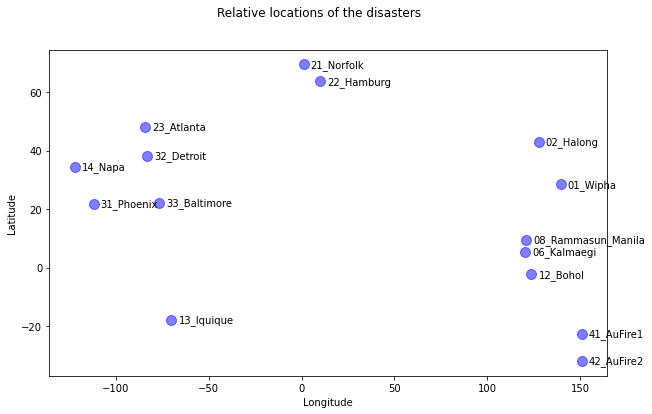

In [126]:
import matplotlib.pyplot as plt

labels = ['01_Wipha','02_Halong','06_Kalmaegi','08_Rammasun_Manila','12_Bohol','13_Iquique','14_Napa','21_Norfolk','22_Hamburg','23_Atlanta','31_Phoenix','32_Detroit','33_Baltimore','41_AuFire1','42_AuFire2']


# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Relative locations of the disasters')
x=df_disaster_groups['latitude']
y=df_disaster_groups['longitude']
# Plot the scatter points
ax.scatter(x,y,
           color="blue",  # Color of the dots
           s=100,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1)  # Size of edge around the dots

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

plt.xlabel("Longitude")
plt.ylabel("Latitude")
# Show the plot
plt.show()

In [162]:
import folium
#from folium.plugins import MarkerCluster
disasters = ['01_Wipha','02_Halong','06_Kalmaegi','08_Rammasun_Manila','12_Bohol','13_Iquique','14_Napa','21_Norfolk','22_Hamburg','23_Atlanta','31_Phoenix','32_Detroit','33_Baltimore','41_AuFire1','42_AuFire2']

SF_COORDINATES = (37.76, -122.45)
m = folium.Map(location=SF_COORDINATES, zoom_start=12)

data_new = data.head()
count=0
# add a marker for every record in the filtered data, use a clustered view
for each in df_disaster_groups.iterrows():
    #print(each[1]['latitude'])
    folium.Marker(
        location = [each[1]['longitude'],each[1]['latitude']], popup=disasters[count]).add_to(m)
    count+=1
display(m)

In [164]:
import skmob
data_33_baltimore = data.loc[data['events']=='13_Iquique']
tdf = skmob.TrajDataFrame(data_33_baltimore, latitude='longitude', longitude='latitude', datetime='time', user_id='user')
#len(td)

tdf.plot_trajectory(zoom=12, weight=2, opacity=0.5, tiles='Stamen Toner')

In [73]:
uid_0 = data.loc[(data['disaster.event']=='14_Napa') & ((data['id']=='14_Napa 1') | (data['id']=='14_Napa 3'))]
uid_0
tdf_u_0 = skmob.TrajDataFrame(uid_0, latitude='longitude.anon', longitude='latitude', datetime='time', user_id='id')
#len(tdf_u_0)

In [74]:
uid_0

,disaster.event,user.anon,latitude,longitude.anon,time,id
2579280,14_Napa,1,-122.271651,34.476407,2014-08-23 16:53:23,14_Napa 1
2579281,14_Napa,1,-122.271929,34.476850,2014-08-23 18:36:07,14_Napa 1
2579283,14_Napa,3,-122.311231,34.448051,2014-07-30 13:05:52,14_Napa 3
2579284,14_Napa,3,-122.311114,34.448052,2014-07-30 13:39:35,14_Napa 3
2579285,14_Napa,3,-122.311166,34.448061,2014-07-30 13:52:43,14_Napa 3
...,...,...,...,...,...,...
2579725,14_Napa,3,-122.311178,34.447926,2014-08-07 20:11:15,14_Napa 3
2579726,14_Napa,3,-122.311244,34.447925,2014-08-07 20:20:46,14_Napa 3
2579727,14_Napa,3,-122.311252,34.447884,2014-08-07 21:09:54,14_Napa 3
2579728,14_Napa,3,-122.311274,34.447925,2014-08-07 22:08:53,14_Napa 3


In [79]:
tdf.plot_trajectory(zoom=12, weight=3, opacity=0.9, tiles='Stamen Toner')

C:\Users\saad6\Downloads\UMD\vfrias\scikit_mobility\scikit-mobility\skmob\utils\plot.py:143: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dtime = pd.datetime.strftime(dtime, '%Y/%m/%d %H:%M')
C:\Users\saad6\Downloads\UMD\vfrias\scikit_mobility\scikit-mobility\skmob\utils\plot.py:152: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dtime = pd.datetime.strftime(dtime, '%Y/%m/%d %H:%M')
